In [1]:
#Import Modul yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
#Data Himpunan Awal
minta = [25, 35, 40, 45, 30, 55, 20, 15, 10, 50, 25, 55, 60, 30]

frequensi = np.random.randint(1, 25, size=14)

print(frequensi)

ngacak = []
interval = []
simulasi = []
untung = []

hari = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Himpunan distribusi kumulatif dengan nilai awal 0
kumulatif= [0]

[21 12 17  4 24  1 11  6  8 21 13  9  4  9]


In [3]:
#Deklarasi variabel awal
freqtot = 0
distp = 0
freqi = 0
dari=0
alpha = 43
c = 37
m = 61
nilais = 0
harga = 40000
modal = 20000
jadi = 0

In [4]:
#Fungsi untuk Menghitung Probabilitas
def kemungkinan(freq, n):
    return freq/n
    
#Fungsi untuk Menghitung angka acak dengan rumus
def angacak(x,a,c):
    return (x*a+c)
    
def mod(x,m):
    return x % m

#Fungsi untuk Mencari nilai dalam interval
def find(minta,kumulatif,interval,angka):
    for i in range(8):
        if (kumulatif[i] <= angka <=interval[i]):
            nilai = minta[i]
        else:
            pass
    return nilai

In [5]:
# Menghitung jumlah Frequensi
for i in range(len(frequensi)):
    freqtot += frequensi[i]
print(freqtot)

160


In [6]:
#Menghitung Distribusi Kemungkinan, Kumulatif dan Interval angka Acak
table1 = PrettyTable(['No', 'Permintaan/hari(kg)','Frekuensi','Distribusi Kemungkinan','Distribusi Kemungkinan Kumulatif'])
table2 = PrettyTable(['No', 'Permintaan/hari(kg)','Distribusi Kemungkinan','Distribusi Kemungkinan Kumulatif','Interval Angka'])
for i in range(len(minta)):
    dist = kemungkinan(frequensi[i], freqtot)
    distp += dist
    kum = round(distp, 2)
    sampai = int(kum*100)
    interval.append(sampai)
    table1.add_row([i+1,minta[i], frequensi[i], round(dist,2), kum])
    table2.add_row([i+1,minta[i], round(dist,2), kum, f'{kumulatif[i]} - {sampai}'])
    kumulatif.append(int(kum*100+1))
print(table1)
print('Total Frequensi =', freqtot)
print(table2)

+----+---------------------+-----------+------------------------+----------------------------------+
| No | Permintaan/hari(kg) | Frekuensi | Distribusi Kemungkinan | Distribusi Kemungkinan Kumulatif |
+----+---------------------+-----------+------------------------+----------------------------------+
| 1  |          25         |     21    |          0.13          |               0.13               |
| 2  |          35         |     12    |          0.08          |               0.21               |
| 3  |          40         |     17    |          0.11          |               0.31               |
| 4  |          45         |     4     |          0.02          |               0.34               |
| 5  |          30         |     24    |          0.15          |               0.49               |
| 6  |          55         |     1     |          0.01          |               0.49               |
| 7  |          20         |     11    |          0.07          |               0.56       

In [7]:
#Menghitung Angka Acak
acak = np.random.randint(100)
ngacak.append(acak)

table3 = PrettyTable(['No', 'Xa+C mod M','Xi','Ui=Xi/M'])
for i in range(len(minta)):
    acak = angacak(ngacak[i],alpha,c)
    xi = mod(acak,m)
    ngacak.append(xi)
    u = round(xi / m,3)
    table3.add_row([i+1, acak, xi , u])
print(ngacak[0])
ngacak.pop(0)
print(table3)

table4 = PrettyTable(['No', 'Permintaan/hari(kg)','Interval Angka Acak','Bilangan Acak','Simulasi Permintaan'])
for i in range(len(minta)):
    nilai = find(minta,kumulatif,interval,ngacak[i])
    table4.add_row([i+1,minta[i], f'{kumulatif[i]}-{interval[i]}', ngacak[i], nilai])
    simulasi.append(nilai)
    nilais +=nilai
print(table4)
print('Total Permintaan =', nilais , 'kg')

59
+----+------------+----+---------+
| No | Xa+C mod M | Xi | Ui=Xi/M |
+----+------------+----+---------+
| 1  |    2574    | 12 |  0.197  |
| 2  |    553     | 4  |  0.066  |
| 3  |    209     | 26 |  0.426  |
| 4  |    1155    | 57 |  0.934  |
| 5  |    2488    | 48 |  0.787  |
| 6  |    2101    | 27 |  0.443  |
| 7  |    1198    | 39 |  0.639  |
| 8  |    1714    | 6  |  0.098  |
| 9  |    295     | 51 |  0.836  |
| 10 |    2230    | 34 |  0.557  |
| 11 |    1499    | 35 |  0.574  |
| 12 |    1542    | 17 |  0.279  |
| 13 |    768     | 36 |   0.59  |
| 14 |    1585    | 60 |  0.984  |
+----+------------+----+---------+
+----+---------------------+---------------------+---------------+---------------------+
| No | Permintaan/hari(kg) | Interval Angka Acak | Bilangan Acak | Simulasi Permintaan |
+----+---------------------+---------------------+---------------+---------------------+
| 1  |          25         |         0-13        |       12      |          25         |
| 2  |     

In [8]:
#Memenghitung Keuntungan
table5 = PrettyTable(['No', 'Simulasi Permintaan','Keuntungan'])
for i in range(len(simulasi)):
    tk = simulasi[i] * harga - simulasi[i] * modal
    table5.add_row([i+1,simulasi[i], tk])
    untung.append(tk)
    jadi = jadi + tk
print(table5)
print('Total Keuntungan = Rp', jadi)

+----+---------------------+------------+
| No | Simulasi Permintaan | Keuntungan |
+----+---------------------+------------+
| 1  |          25         |   500000   |
| 2  |          25         |   500000   |
| 3  |          40         |   800000   |
| 4  |          15         |   300000   |
| 5  |          30         |   600000   |
| 6  |          40         |   800000   |
| 7  |          30         |   600000   |
| 8  |          25         |   500000   |
| 9  |          20         |   400000   |
| 10 |          45         |   900000   |
| 11 |          30         |   600000   |
| 12 |          35         |   700000   |
| 13 |          30         |   600000   |
| 14 |          15         |   300000   |
+----+---------------------+------------+
Total Keuntungan = Rp 8100000


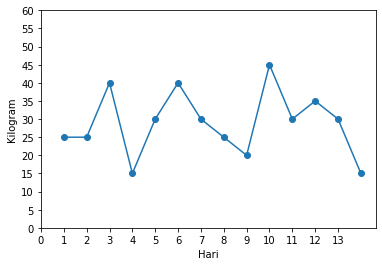

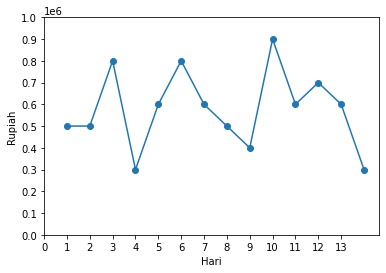

In [9]:
#Membuat Grafik Simulasi Permintaan
f = plt.figure(num='Grafik Simulasi Permintaan')
f = plt.plot(hari,simulasi, marker="o")
f = plt.xticks(np.arange(0, max(hari), 1))
f = plt.yticks(np.arange(0, max(simulasi)+20, 5))
f = plt.xlabel("Hari")
f = plt.ylabel("Kilogram")

#Membuat Grafik Simulasi Keuntungan
g = plt.figure(num='Grafik Simulasi Keuntungan')
g = plt.plot(hari,untung, marker="o")
f = plt.xticks(np.arange(0, max(hari), 1))
g = plt.yticks(np.arange(0, max(untung)+200000, 100000))
g = plt.xlabel("Hari")
g = plt.ylabel("Rupiah")

In [10]:
#Menampilkan Grafik
plt.show()